In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # type: ignore # linear algebra
import pandas as pd # type: ignore # data processing, CSV file I/O (e.g. pd.read_csv)

a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4),surprise(5).

In [2]:
emo_la={0:'neutral',1:'joy',2:'surprise',3:'anger',4:'sadness',5:'disgust',6:'fear'}

In [3]:
emo_la[0]

'neutral'

# Exploratory_Data_Analysis

In [4]:
# Assuming your data is in a CSV file
df = pd.read_csv('SMED/Social Media Emotion Dataset.csv')

# Rename Columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)

# Dropping the Index Column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Replace Label values
#label_mapping = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
#df['Label'] = df['Label'].replace(label_mapping)

# Display the first few rows of the DataFrame to verify changes
print(df.head())

                                                Text     Label
0            i just feel horribly selfish fraudulent     Angry
1                        @Talula25 How have you been   Neutral
2  @dilyaela nope not really only a sweatshirt.  ...  Surprise
3                               ordered my new shirt     Happy
4  you don't seem real at all  i was just saying ...   Neutral


In [5]:
df['Label'].value_counts()

Label
Neutral     23586
Happy       23377
Sad         16671
Angry        9373
Surprise     2840
Name: count, dtype: int64

In [6]:
# Check column names to ensure 'text' or 'Text' exists
print(df.columns)

# Locate duplicate text
# Replace 'text' with the correct column name if necessary
duplicated_texts = df[df.duplicated(subset='Text', keep=False)].sort_values(by='Text')

# If there is duplicate text, process it
if not duplicated_texts.empty:
    # Keep only the 'Text' and 'Label' columns
    duplicated_texts = duplicated_texts[['Text', 'Label']]
    
    # Drop duplicates in the 'Text' column, keeping the first occurrence
    duplicated_texts = duplicated_texts.drop_duplicates(subset='Text', keep='first')
    
    # Drop the duplicate rows from the original DataFrame
    df = df.drop(duplicated_texts.index)
    
    # Reset the index of the DataFrame
    df.reset_index(drop=True, inplace=True)

# Check if there are any texts with multiple labels after processing
duplicated_texts = df[df.duplicated(subset='Text', keep=False)].sort_values(by='Text')
if not duplicated_texts.empty:
    print("Texts with multiple labels:")
    print(duplicated_texts[['Text', 'Label']])
else:
    print("No duplicate text was found.")

Index(['Text', 'Label'], dtype='object')
Texts with multiple labels:
                                                    Text    Label
64692  #frenchieb-day #frenchieb-day #frenchieb-day #...  Neutral
19924  #frenchieb-day #frenchieb-day #frenchieb-day #...  Neutral
35443                                                  0  Neutral
66714                                                  0  Neutral
39170                                                  0  Neutral
...                                                  ...      ...
55032                                 ok how was it nice  Neutral
34488                             ok u are ok i'm not ok      Sad
26610                             ok u are ok i'm not ok      Sad
57522                     what even '6' what' i hate dis    Angry
39535                     what even '6' what' i hate dis    Angry

[110 rows x 2 columns]


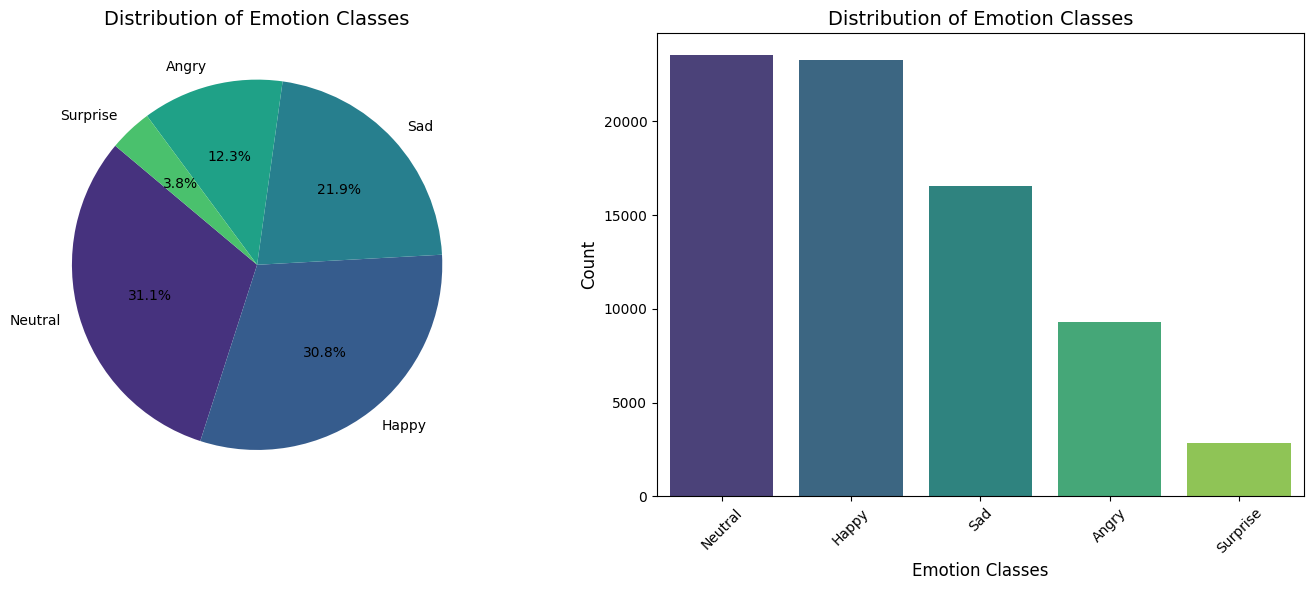

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into a DataFrame called `df`
# If not, load your data as shown in the previous example

# Value Count of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0].set_title('Distribution of Emotion Classes', fontsize=14)

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, hue=count.index, palette="viridis", ax=axs[1], legend=False)
axs[1].set_title('Distribution of Emotion Classes', fontsize=14)
axs[1].set_xlabel('Emotion Classes', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

      Label  Word_Count
0     Angry      148421
1     Happy      359044
2   Neutral      287615
3       Sad      248180
4  Surprise       42438


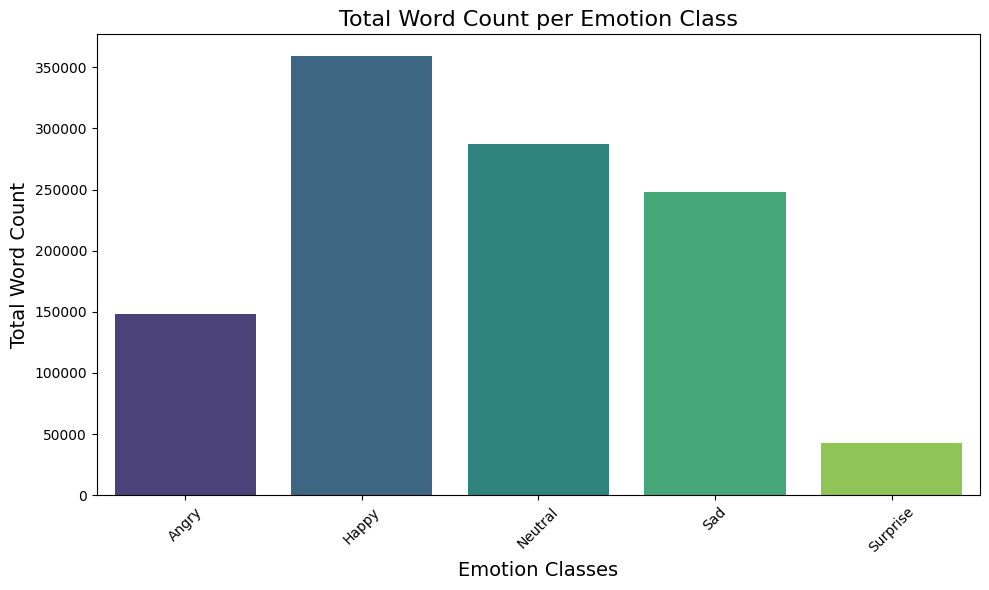

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into a DataFrame called `df`
# If not, load your data as shown in the previous example

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Apply the word count function to the 'Text' column
df['Word_Count'] = df['Text'].apply(count_words)

# Group by 'Label' and sum the word counts
word_count_per_class = df.groupby('Label')['Word_Count'].sum().reset_index()

# Display the word count per class
print(word_count_per_class)

# Plot the word count per class
plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Word_Count', hue='Label', data=word_count_per_class, palette='viridis', legend=False)

# Add labels and title
plt.xlabel('Emotion Classes', fontsize=14)
plt.ylabel('Total Word Count', fontsize=14)
plt.title('Total Word Count per Emotion Class', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import plotly.express as px

# Assuming your data is already loaded into a DataFrame called `df`
# If not, load your data as shown in the previous example

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Apply the word count function to the 'Text' column
df['Word_Count'] = df['Text'].apply(count_words)

# Group by 'Label' and sum the word counts
word_count_per_class = df.groupby('Label')['Word_Count'].sum().reset_index()

# Create a Donut Chart
fig = px.pie(word_count_per_class, values='Word_Count', names='Label', title='Word Count per Emotion Class (Donut Chart)', hole=0.4)

# Show the plot
fig.show()

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Assuming your dataset is already loaded into a DataFrame called `df`
# If not, load your data as shown in the previous example

# Step 1: Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

df['Text'] = df['Text'].apply(remove_urls)

# Step 2: Remove special characters and punctuation
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['Text'] = df['Text'].apply(remove_special_chars)

# Step 3: Remove extra whitespaces
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

df['Text'] = df['Text'].apply(remove_extra_whitespace)

# Step 4: Remove numeric values
def remove_numeric_values(text):
    return re.sub(r'\d+', '', text)

df['Text'] = df['Text'].apply(remove_numeric_values)

# Step 5: Lowercasing
df['Text'] = df['Text'].str.lower()

# Step 6: Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Text'] = df['Text'].apply(remove_stopwords)

# Step 7: Remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['Text'] = df['Text'].apply(remove_non_alphanumeric)

# Display the cleaned DataFrame
print(df.head())

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Hussain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text     Label  Word_Count
0                   feel horribly selfish fraudulent     Angry           6
1                                             talula   Neutral           5
2  dilyaela nope really sweatshirt oh really real...  Surprise          15
3                                  ordered new shirt     Happy           4
4                              dont seem real saying   Neutral          13


In [11]:
from sklearn.model_selection import train_test_split

# Assuming your cleaned DataFrame is stored in `df`
# and it has two columns: 'Text' (features) and 'Label' (target)

# Step 1: Split the data into training (70%) and temporary (30%) sets
train_data, temp_data, train_labels, temp_labels = train_test_split(
    df['Text'],  # Features (text data)
    df['Label'],  # Labels (target)
    test_size=0.3,  # 30% of the data for temporary set
    random_state=42  # Set a random seed for reproducibility
)

# Step 2: Split the temporary data into validation (50%) and testing (50%) sets
val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data,  # Temporary features
    temp_labels,  # Temporary labels
    test_size=0.5,  # 50% of the temporary data for testing
    random_state=42  # Set a random seed for reproducibility
)

# Display the sizes of the resulting datasets
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 52873
Validation set size: 11330
Testing set size: 11331


In [12]:
# Save training data
train_df = pd.DataFrame({'Text': train_data, 'Label': train_labels})
train_df.to_csv('train_data.csv', index=False)

# Save validation data
val_df = pd.DataFrame({'Text': val_data, 'Label': val_labels})
val_df.to_csv('val_data.csv', index=False)

# Save testing data
test_df = pd.DataFrame({'Text': test_data, 'Label': test_labels})
test_df.to_csv('test_data.csv', index=False)

# Knowledge Distillation Model

In [13]:
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AlbertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler, autocast
from sklearn.utils.class_weight import compute_class_weight

# Set CUDA_LAUNCH_BLOCKING=1 for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Hyperparameters
batch_size = 64
epochs_teacher = 10  # Teacher training epochs
epochs_student = 10  # Student training epochs
initial_lr = 2e-5  # Initial learning rate for teacher
student_lr = 1e-5  # Learning rate for student
T = 1.5  # Temperature for soft targets
alpha = 0.8  # Weight for knowledge distillation loss
initial_weight_decay = 1e-2  # Weight decay
patience = 5  # Early stopping patience
max_grad_norm = 1.0  # Gradient clipping
label_smoothing = 0.1  # Label smoothing

# Assuming your dataset is already loaded into a DataFrame called `df`
# Replace 'Text' and 'Label' with your actual column names
train_data = df['Text'].values
train_labels = df['Label'].values

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)

# Compute class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Initialize Tokenizer for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Custom Dataset class for text input
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Split data into train, validation, and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=0.5, random_state=42)

# Create datasets
train_dataset = TextDataset(train_texts, train_labels, tokenizer)
val_dataset = TextDataset(val_texts, val_labels, tokenizer)
test_dataset = TextDataset(test_texts, test_labels, tokenizer)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define Teacher and Student Models
teacher_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=5,  # Number of emotion classes
    hidden_dropout_prob=0.3  # Dropout rate
)

# Change student model to ALBERT
student_model = AlbertForSequenceClassification.from_pretrained(
    'albert-base-v2',
    num_labels=5,  # Number of emotion classes
    output_hidden_states=True  # Enable hidden states
)

# Move models to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
teacher_model.to(device)
student_model.to(device)

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

# ---------------------------
# 2. Define Validation Function
# ---------------------------
def validate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validation", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            loss = outputs.loss
            
            val_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = val_loss / len(val_loader)
    accuracy = correct / total * 100
    print(f"Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_loss, accuracy

# ---------------------------
# 3. Train Teacher Model
# ---------------------------
def train_teacher(model, train_loader, val_loader, epochs, lr):
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=initial_weight_decay)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    criterion = FocalLoss(alpha=0.25, gamma=2)  # Use Focal Loss
    scaler = GradScaler()  # For mixed precision training
    best_val_loss = float('inf')
    trigger_times = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for batch in tqdm(train_loader, desc=f"Teacher Epoch {epoch+1}/{epochs}", leave=False):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            with autocast():  # Mixed precision training
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                logits = outputs.logits
                loss = criterion(logits, labels)
            
            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)  # Gradient clipping
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        accuracy = correct / total * 100
        print(f"Teacher Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
        
        # Validate after each epoch
        val_loss, val_accuracy = validate_model(model, val_loader)
        scheduler.step(val_loss)  # Adjust learning rate based on validation loss
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping!")
                break
    
    return model

# ---------------------------
# 4. Train Student Model with Knowledge Distillation
# ---------------------------
def train_student_with_kd(teacher_model, student_model, train_loader, epochs, lr, temperature, alpha):
    student_model.train()
    optimizer = optim.AdamW(student_model.parameters(), lr=lr, weight_decay=initial_weight_decay)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    criterion = FocalLoss(alpha=0.25, gamma=2)  # Use Focal Loss
    scaler = GradScaler()  # For mixed precision training
    best_val_loss = float('inf')
    trigger_times = 0

    def kd_loss(student_logits, teacher_logits):
        student_probs = torch.nn.functional.softmax(student_logits / temperature, dim=-1)
        teacher_probs = torch.nn.functional.softmax(teacher_logits / temperature, dim=-1)
        return torch.nn.functional.kl_div(student_probs.log(), teacher_probs, reduction='batchmean')
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for batch in tqdm(train_loader, desc=f"Student KD Epoch {epoch+1}/{epochs}", leave=False):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            # Teacher's output
            with torch.no_grad():
                teacher_outputs = teacher_model(input_ids, attention_mask=attention_mask)
                teacher_logits = teacher_outputs.logits
            
            # Student's forward pass
            with autocast():  # Mixed precision training
                student_outputs = student_model(input_ids, attention_mask=attention_mask)
                student_logits = student_outputs.logits
                
                # Compute losses
                ce_loss = criterion(student_logits, labels)  # Standard loss
                kd_loss_value = kd_loss(student_logits, teacher_logits)  # Knowledge distillation loss
                total_loss = alpha * kd_loss_value + (1 - alpha) * ce_loss  # Combined loss
                
            scaler.scale(total_loss).backward()
            torch.nn.utils.clip_grad_norm_(student_model.parameters(), max_grad_norm)  # Gradient clipping
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            _, predicted = torch.max(student_logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        accuracy = correct / total * 100
        print(f"Student KD Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
        
        # Validate after each epoch
        val_loss, val_accuracy = validate_model(student_model, val_loader)
        scheduler.step(val_loss)  # Adjust learning rate based on validation loss
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping!")
                break
    
    return student_model

# ---------------------------
# 5. Evaluate Model
# ---------------------------
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")
    
    # Compute additional evaluation metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    
    print(f"Test F1 Score: {f1:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    
    return accuracy, f1, precision, recall

# ---------------------------
# 6. Run Training and Evaluation
# ---------------------------
# Train Teacher Model
teacher_model = train_teacher(teacher_model, train_loader, val_loader, epochs_teacher, initial_lr)

# Train Student Model with Knowledge Distillation
student_model = train_student_with_kd(teacher_model, student_model, train_loader, epochs_student, student_lr, T, alpha)

# Evaluate Teacher and Student Model on Test Data
print("\nTeacher Model Evaluation:")
evaluate_model(teacher_model, test_loader)

print("\nStudent Model Evaluation:")
evaluate_model(student_model, test_loader)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Teacher Epoch [1/10], Loss: 0.1753, Accuracy: 49.10%


Validation Loss: 1.0190, Accuracy: 62.90%


Teacher Epoch [2/10], Loss: 0.1080, Accuracy: 69.40%


Validation Loss: 0.8446, Accuracy: 71.49%


Teacher Epoch [3/10], Loss: 0.0913, Accuracy: 73.79%


Validation Loss: 0.7976, Accuracy: 73.07%


Teacher Epoch [4/10], Loss: 0.0855, Accuracy: 75.27%


Validation Loss: 0.7805, Accuracy: 73.45%


Teacher Epoch [5/10], Loss: 0.0786, Accuracy: 76.81%


Validation Loss: 0.7625, Accuracy: 73.97%


Teacher Epoch [6/10], Loss: 0.0702, Accuracy: 78.57%


Validation Loss: 0.7463, Accuracy: 74.10%


Teacher Epoch [7/10], Loss: 0.0625, Accuracy: 80.33%


Validation Loss: 0.7477, Accuracy: 73.84%


Teacher Epoch [8/10], Loss: 0.0575, Accuracy: 81.31%


Validation Loss: 0.7497, Accuracy: 72.83%


Teacher Epoch [9/10], Loss: 0.0465, Accuracy: 84.04%


Validation Loss: 0.7691, Accuracy: 72.45%
Epoch 00009: reducing learning rate of group 0 to 2.0000e-06.


Teacher Epoch [10/10], Loss: 0.0339, Accuracy: 87.85%


Validation Loss: 0.7694, Accuracy: 72.91%


Student KD Epoch [1/10], Loss: 0.3453, Accuracy: 45.65%


Validation Loss: 1.1676, Accuracy: 54.30%


Student KD Epoch [2/10], Loss: 0.2549, Accuracy: 58.40%


Validation Loss: 1.0578, Accuracy: 60.93%


Student KD Epoch [3/10], Loss: 0.2074, Accuracy: 63.73%


Validation Loss: 1.0123, Accuracy: 63.10%


Student KD Epoch [4/10], Loss: 0.1842, Accuracy: 66.20%


Validation Loss: 0.9816, Accuracy: 64.85%


Student KD Epoch [5/10], Loss: 0.1627, Accuracy: 68.49%


Validation Loss: 0.9665, Accuracy: 65.70%


Student KD Epoch [6/10], Loss: 0.1497, Accuracy: 69.85%


Validation Loss: 0.9626, Accuracy: 65.01%


Student KD Epoch [7/10], Loss: 0.1390, Accuracy: 71.10%


Validation Loss: 0.9265, Accuracy: 66.98%


Student KD Epoch [8/10], Loss: 0.1292, Accuracy: 72.10%


Validation Loss: 0.9281, Accuracy: 67.24%


Student KD Epoch [9/10], Loss: 0.1201, Accuracy: 73.07%


Validation Loss: 0.9256, Accuracy: 67.24%


Student KD Epoch [10/10], Loss: 0.1133, Accuracy: 73.86%


Validation Loss: 0.9077, Accuracy: 67.75%

Teacher Model Evaluation:


Test Accuracy: 72.17%
Test F1 Score: 0.7186
Test Precision: 0.7189
Test Recall: 0.7217

Student Model Evaluation:


Test Accuracy: 67.12%
Test F1 Score: 0.6647
Test Precision: 0.6817
Test Recall: 0.6712


(67.11675933280381, 0.6646647628405834, 0.6816970668333852, 0.6711675933280381)

In [19]:
def collect_misclassified_examples(model, test_loader):
    model.eval()
    misclassified_examples = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Collecting Misclassified Examples", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            for i in range(len(labels)):
                if predicted[i] != labels[i]:
                    misclassified_examples.append({
                        'text': tokenizer.decode(input_ids[i], skip_special_tokens=True),
                        'true_label': label_encoder.inverse_transform([labels[i].cpu().numpy()])[0],
                        'predicted_label': label_encoder.inverse_transform([predicted[i].cpu().numpy()])[0]
                    })

    return misclassified_examples

# Collect misclassified examples for the student model
misclassified_examples = collect_misclassified_examples(student_model, test_loader)

# Convert to DataFrame for easier analysis
misclassified_df = pd.DataFrame(misclassified_examples)
print(misclassified_df.head())

                                                text true_label  \
0      thats people saying either talk sensibly dont      Angry   
1  clickjow depois tu pode ver outras sries te in...    Neutral   
2  world im chillin bout go get money economy mon...      Happy   
3  funny kind funny though grinningfacewithbigeye...        Sad   
4  akarra werent quotpickyquot precise might find...      Happy   

  predicted_label  
0         Neutral  
1             Sad  
2         Neutral  
3           Happy  
4         Neutral  


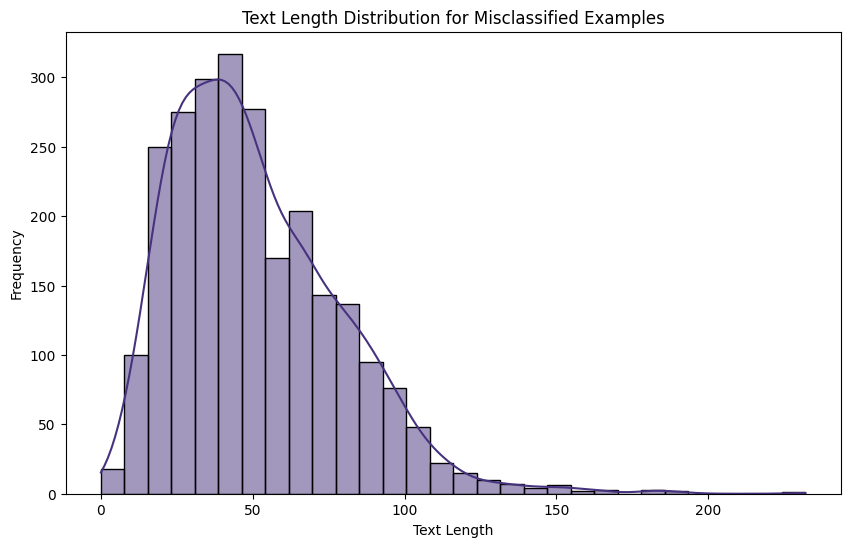

In [20]:
# Add text length to the DataFrame
misclassified_df['text_length'] = misclassified_df['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(misclassified_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution for Misclassified Examples')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Print a sample of misclassified examples
for i, row in misclassified_df.sample(5).iterrows():
    print(f"Text: {row['text']}")
    print(f"True Label: {row['true_label']}")
    print(f"Predicted Label: {row['predicted_label']}")
    print("-" * 50)

Text: worst headache ever history worst headaches today man hate
True Label: Angry
Predicted Label: Sad
--------------------------------------------------
Text: putnampig going sausage yum yum
True Label: Neutral
Predicted Label: Happy
--------------------------------------------------
Text: going ek nao meet bloggers instead makati
True Label: Neutral
Predicted Label: Happy
--------------------------------------------------
Text: dont think im well time weekend
True Label: Happy
Predicted Label: Sad
--------------------------------------------------
Text: haha hahaha know yeah joking forgive something wrong
True Label: Happy
Predicted Label: Neutral
--------------------------------------------------


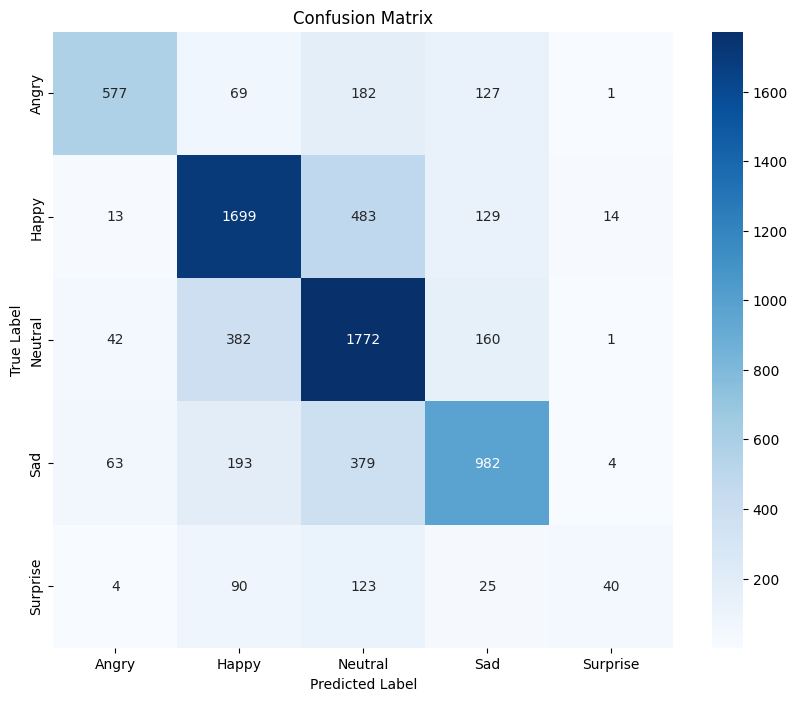

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, test_loader):
    model.eval()
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Confusion Matrix", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(predicted.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_true_labels, all_predicted_labels)
    class_names = label_encoder.classes_

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for the student model
plot_confusion_matrix(student_model, test_loader)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

def generate_classification_report(model, test_loader):
    model.eval()
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Predictions", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(predicted.cpu().numpy())

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(
        all_true_labels,
        all_predicted_labels,
        target_names=label_encoder.classes_,
        digits=4
    ))
    
    # Print accuracy
    print(f"Accuracy: {accuracy_score(all_true_labels, all_predicted_labels):.4f}")
    
    # Print label mapping
    print("\nEmotion Label Mapping:")
    print(dict(enumerate(label_encoder.classes_)))

# Example usage for student model
print("Student Model Evaluation:")
generate_classification_report(student_model, test_loader)

# Example usage for teacher model
print("\nTeacher Model Evaluation:")
generate_classification_report(teacher_model, test_loader)

Student Model Evaluation:



Classification Report:
              precision    recall  f1-score   support

       Angry     0.8255    0.6036    0.6973       956
       Happy     0.6983    0.7267    0.7122      2338
     Neutral     0.6029    0.7518    0.6692      2357
         Sad     0.6901    0.6058    0.6452      1621
    Surprise     0.6667    0.1418    0.2339       282

    accuracy                         0.6712      7554
   macro avg     0.6967    0.5659    0.5916      7554
weighted avg     0.6817    0.6712    0.6647      7554

Accuracy: 0.6712

Emotion Label Mapping:
{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}

Teacher Model Evaluation:



Classification Report:
              precision    recall  f1-score   support

       Angry     0.8157    0.7406    0.7763       956
       Happy     0.7497    0.7583    0.7540      2338
     Neutral     0.6731    0.7365    0.7034      2357
         Sad     0.7380    0.7230    0.7304      1621
    Surprise     0.4091    0.2234    0.2890       282

    accuracy                         0.7217      7554
   macro avg     0.6771    0.6364    0.6506      7554
weighted avg     0.7189    0.7217    0.7186      7554

Accuracy: 0.7217

Emotion Label Mapping:
{0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}


Student Model Evaluation - Misclassification Distribution:


<Figure size 1400x800 with 0 Axes>

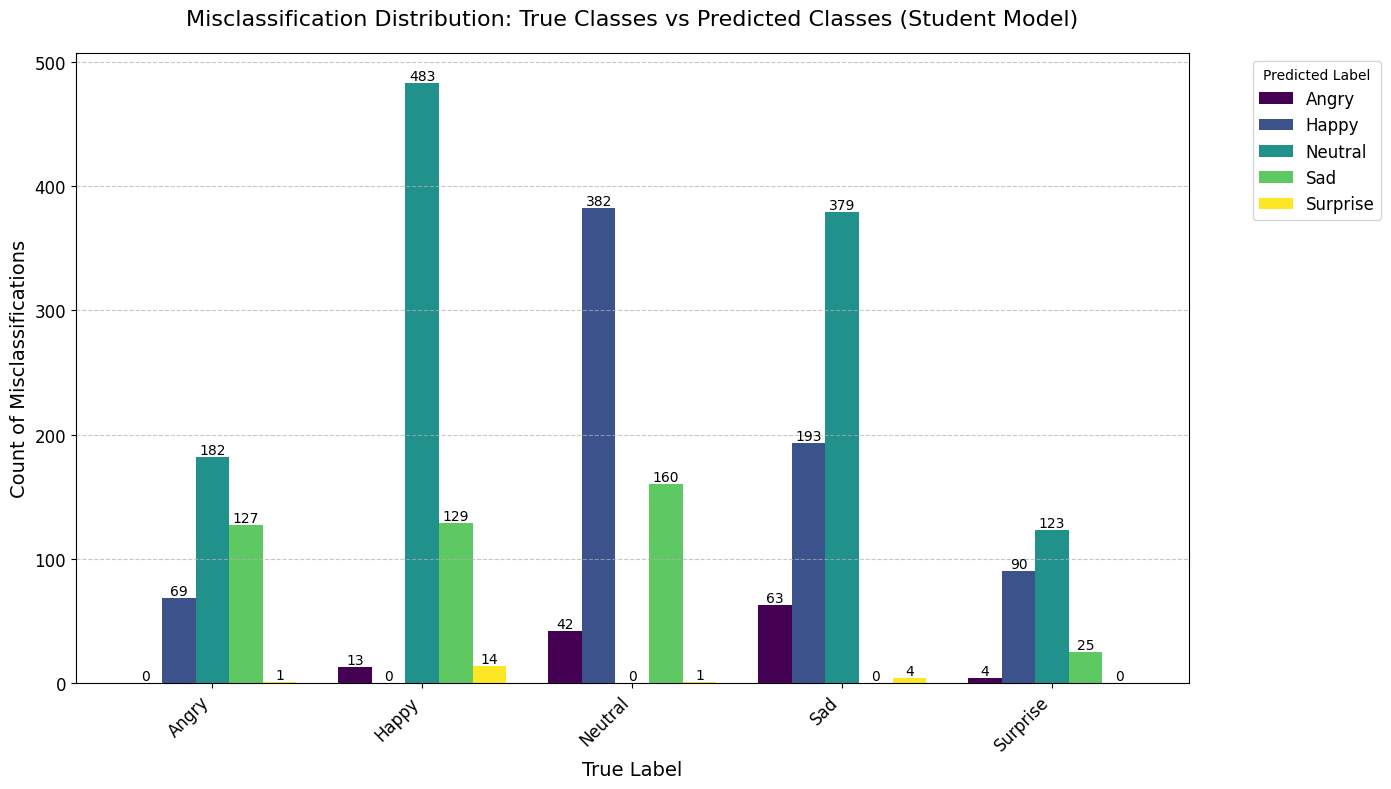

In [37]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

def generate_misclassification_distribution(model, test_loader, label_encoder):
    model.eval()
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Predictions", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(predicted.cpu().numpy())

    # Create DataFrame for misclassifications
    misclassified_df = pd.DataFrame({
        'true_label': all_true_labels,
        'predicted_label': all_predicted_labels
    })

    # Create a confusion matrix (cross-tab) of true vs predicted labels
    cross_tab = pd.crosstab(misclassified_df['true_label'], misclassified_df['predicted_label'])

    # Define the order of classes based on the actual labels in cross_tab
    class_order = cross_tab.index.tolist()  # Use the exact labels from cross_tab

    # Reorder the cross-tabulation based on the defined class order
    cross_tab = cross_tab.loc[class_order, class_order]

    # Remove the diagonal (correct predictions) to only show misclassifications
    misclassified_tab = cross_tab.copy()
    for i in range(len(misclassified_tab)):
        misclassified_tab.iloc[i, i] = 0  # Set diagonal to 0 to exclude correct classifications

    # Create a grouped bar plot for misclassifications only
    plt.figure(figsize=(14, 8))
    ax = misclassified_tab.plot(kind='bar', width=0.8, colormap='viridis', figsize=(14, 8))

    # Add title and labels
    plt.title('Misclassification Distribution: True Classes vs Predicted Classes (Student Model)', fontsize=16, pad=20)
    plt.xlabel('True Label', fontsize=14)
    plt.ylabel('Count of Misclassifications', fontsize=14)

    # Customize legend to show predicted label names
    class_names = {0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}
    predicted_labels = [class_names[i] for i in misclassified_tab.columns]  # Mapping predicted indices to label names
    plt.legend(title='Predicted Label', labels=predicted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Map integer labels to class names for the x-axis
    plt.xticks(ticks=range(len(misclassified_tab.index)), labels=[class_names[i] for i in misclassified_tab.index], rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",  # Display the count as an integer
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the label
            ha='center', va='bottom',  # Alignment of the label
            fontsize=10,  # Font size of the label
            color='black'  # Color of the label
        )

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage for student model only
print("Student Model Evaluation - Misclassification Distribution:")
generate_misclassification_distribution(student_model, test_loader, label_encoder)


Student Model Evaluation - Misclassification Distribution:


<Figure size 1400x800 with 0 Axes>

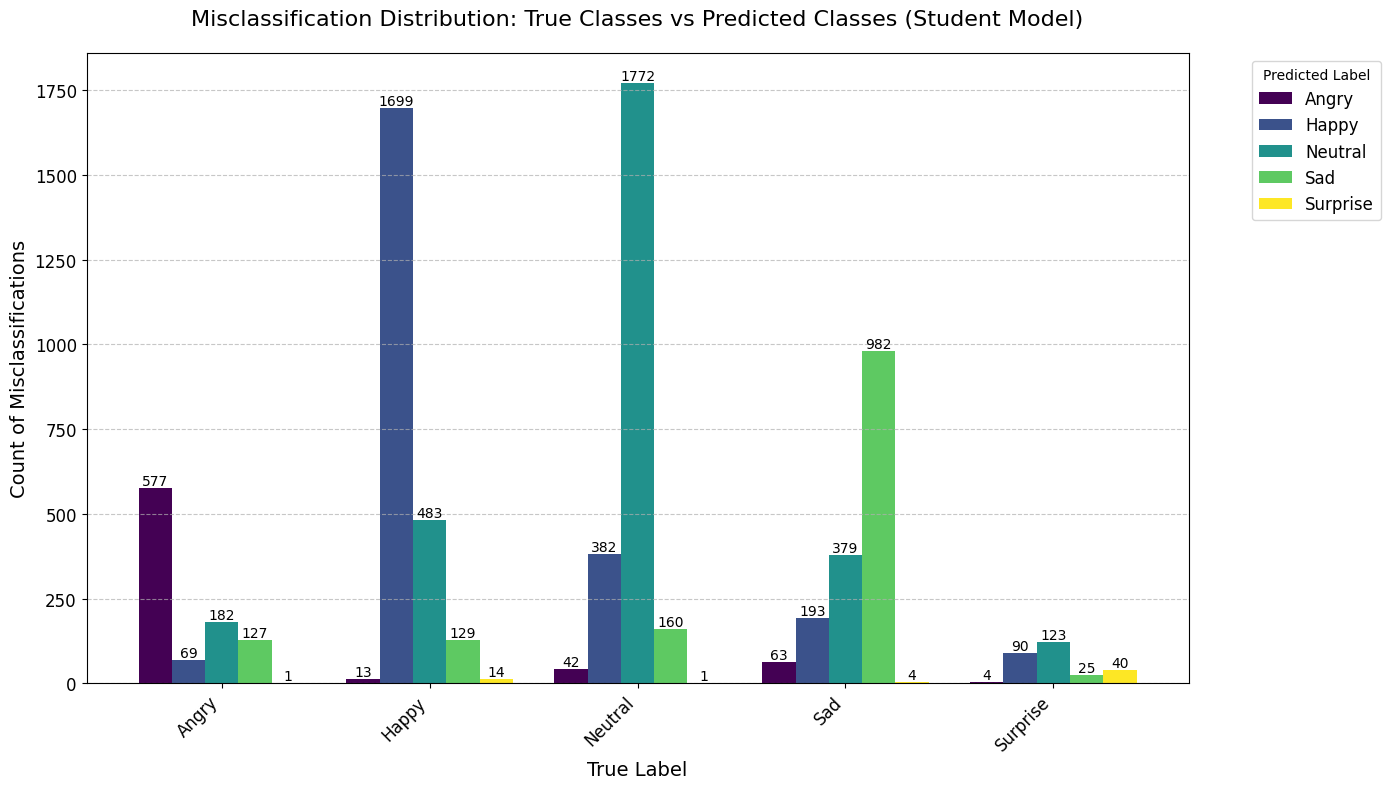

In [35]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

def generate_misclassification_distribution(model, test_loader, label_encoder):
    model.eval()
    all_true_labels = []
    all_predicted_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Predictions", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)

            all_true_labels.extend(labels.cpu().numpy())
            all_predicted_labels.extend(predicted.cpu().numpy())

    # Create DataFrame for misclassifications
    misclassified_df = pd.DataFrame({
        'true_label': all_true_labels,
        'predicted_label': all_predicted_labels
    })

    # Create a confusion matrix (cross-tab) of true vs predicted labels
    cross_tab = pd.crosstab(misclassified_df['true_label'], misclassified_df['predicted_label'])

    # Define the order of classes based on the actual labels in cross_tab
    class_order = cross_tab.index.tolist()  # Use the exact labels from cross_tab

    # Reorder the cross-tabulation based on the defined class order
    cross_tab = cross_tab.loc[class_order, class_order]

    # Plot grouped bar plot with improved formatting
    plt.figure(figsize=(14, 8))
    ax = cross_tab.plot(kind='bar', width=0.8, colormap='viridis', figsize=(14, 8))

    # Add title and labels
    plt.title('Misclassification Distribution: True Classes vs Predicted Classes (Student Model)', fontsize=16, pad=20)
    plt.xlabel('True Label', fontsize=14)
    plt.ylabel('Count of Misclassifications', fontsize=14)

    # Customize legend to show predicted label names
    class_names = {0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}
    predicted_labels = [class_names[i] for i in cross_tab.columns]  # Mapping predicted indices to label names
    plt.legend(title='Predicted Label', labels=predicted_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Map integer labels to class names for the x-axis
    plt.xticks(ticks=range(len(cross_tab.index)), labels=[class_names[i] for i in cross_tab.index], rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add data labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",  # Display the count as an integer
            (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the label
            ha='center', va='bottom',  # Alignment of the label
            fontsize=10,  # Font size of the label
            color='black'  # Color of the label
        )

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage for student model only
print("Student Model Evaluation - Misclassification Distribution:")
generate_misclassification_distribution(student_model, test_loader, label_encoder)


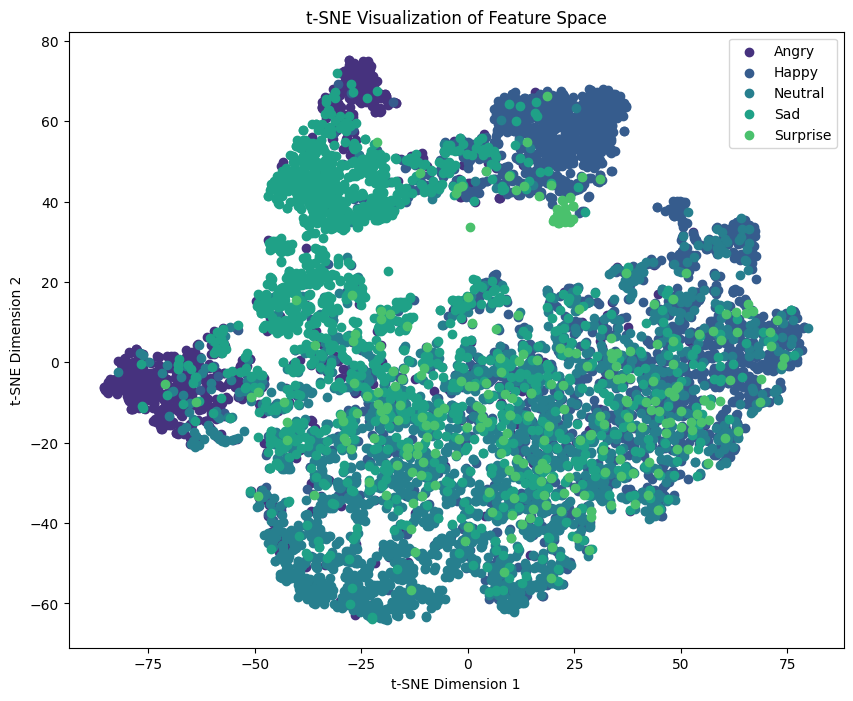

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(model, test_loader):
    model.eval()
    all_features = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating t-SNE Features", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Extract hidden states (features)
            outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
            hidden_states = outputs.hidden_states[-1]  # Use the last hidden state
            cls_embeddings = hidden_states[:, 0, :].cpu().numpy()  # Use [CLS] token embeddings

            all_features.extend(cls_embeddings)
            all_labels.extend(labels.cpu().numpy())

    # Convert to numpy arrays
    all_features = np.array(all_features)
    all_labels = np.array(all_labels)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(all_features)

    # Plot t-SNE results
    plt.figure(figsize=(10, 8))
    for label in np.unique(all_labels):
        indices = all_labels == label
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label_encoder.inverse_transform([label])[0])
    plt.title('t-SNE Visualization of Feature Space')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

# Plot t-SNE for the student model
plot_tsne(student_model, test_loader)